# Tutorial Python P4H

## Primeiros Passos

Em primeiro lugar, precisamos fazer o _download_ do pacote Anaconda no seu computador. Anaconda é um projeto voltado para análise de dados no Python. Os desenvolvedores desse projeto disponibilizam uma espécie de 'pacote' com todos os módulos mais utilizados em _data science_ no Python. Além disso, eles oferecem o `jupyter notebook`, que é provavelmente uma das maneiras mais comuns de se escrever códigos para análise de dados no Python.

Para realizar o download do Anaconda, clique [aqui](https://anaconda.org/). Você será redirecionado ao site oficial do projeto. Em seguinda, clique na aba `Download Anaconda`. Por fim, clique em `Download` para versão 3.X do Python, instale e seja feliz.

## Jupyter Notebook

Ao instalar o pacote Anaconda, você terá disponível no seu computador o `jupyter notebook` (JP). No Windows, basta procurar pelo nome que você irá achar o programa. No Linux, você precisa abrir um terminal e digitar `jupyter notebook`.

### Importando Dados no Python

O `pandas` possui uma série de funções `read_*` para importar dados de CSV, Excel, Stata, SQL, entre outros. Os bancos importados são transformados em um DataFrame. Semelhantemente ao R, um DataFrame é uma maneira de representar dados __retangulares__.

Para utilizar o `pandas` precisamos carregá-lo dentro do nosso ambiente Python com o comando `import pandas as pd`.

In [1]:
import numpy as np
import pandas as pd

Neste tutorial, iremos utilizar a base de candidatos de 2018, disponibilizada pelo [TSE](http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais). Como o banco vem desagregado por UF, tomamos a liberdade de realizar o download e empilhar os arquivos para vocês. Faça o download dele [aqui](https://raw.githubusercontent.com/p4hUSP/material_python/master/data/candidatos_2018.csv).

In [2]:
banco = pd.read_csv("data/candidatos_2018.csv")

/home/rafael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Acessando Informações sobre o Banco

Informações sobre o banco de dados são carregadas como __atributos__ e podem ser acessadas pelo uso do `.` após a chamada do banco. Por exemplo, uma dúvida comum, ao carregar um novo banco de dados, diz respeito aos nomes das variáveis. Essa informação pode ser acessada pelo seguinte comando: `banco.columns`

In [3]:
banco.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

### Estatísticas Descritivas

A partir desse banco podemos acessar algumas informações sobre os candidatos. Entre elas, temos a cor/raça (`DS_COR_RACA`) e o gênero (`DS_GENERO`). Salve engano, as duas informações são autodeclaradas.

O cálculo de estatísticas descritivas (média, desvio padrão, frequência) é relativamente simples no Python. De modo geral, ao utilizar o `pandas`, você terá algumas opções de __método__, isto é, alguns objetos possuem comandos específicos para eles. Por exemplo, no `pandas`, o `DataFrame` possui alguns métodos embutidos como: `sum`, `cov`, `mean`, `median`, `values_count`. Esse último, em especial, é muito útil para cientistas sociais já que em geral trabalhamos muito com variáveis categóricas (gênero, raça, ocupação, etc.).

In [4]:
banco.DS_GENERO.value_counts()

MASCULINO    19666
FEMININO      8943
Name: DS_GENERO, dtype: int64

In [5]:
banco.DS_COR_RACA.value_counts()

BRANCA      15042
PARDA       10168
PRETA        3095
AMARELA       172
INDÍGENA      132
Name: DS_COR_RACA, dtype: int64

Rapidamente, assim, podemos acessar a distribuição de gênero e raça entre todos os candidatos para as eleições de 2018. Porém, o que fazer caso eu queira estatísticas descritivas de __variáveis numéricas__? Há duas possibilidades: 1) chamar a estatística descritiva desejada explicitamente (`mean`, `median`, etc.); 2) utilizar o __método__ `describe` que oferece um agregado de informações de uma única vez. Vamos testar a diferença?

In [6]:
banco.NR_IDADE_DATA_POSSE.mean()

47.86343458352267

A média de idade dos candidatos é 47,8 anos.

In [7]:
banco.NR_IDADE_DATA_POSSE.describe()

count    28609.000000
mean        47.863435
std         13.567615
min         18.000000
25%         40.000000
50%         48.000000
75%         56.000000
max        999.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

Com o `describe`, além da média, recebemos várias informações que podem ser úteis para nós.

### Filtrando Observações

Até agora, retiramos informações sobre __todos__ os candidatos para as eleições de 2018. Nesse sentido, trabalhamos com candidatos a deputado federal, deputado estadual, governador, senador e presidente. Possivelmente, ao realizar uma análise, será de interesse filtrar as observações para um grupo específico.

Antes de realizar a filtragem, vamos ver como estão digitados os nomes dos cargos.

In [8]:
banco.DS_CARGO.value_counts()

DEPUTADO ESTADUAL     17699
DEPUTADO FEDERAL       8424
DEPUTADO DISTRITAL      968
2º SUPLENTE             372
1º SUPLENTE             365
SENADOR                 357
VICE-GOVERNADOR         199
GOVERNADOR              199
PRESIDENTE               13
VICE-PRESIDENTE          13
Name: DS_CARGO, dtype: int64

Que tal trabalharmos com candidatos a deputado federal? Para selecionar observações referentes a esse cargo, precisamos utilizar o seguinte comando `BANCO[BANCO.VAR == X]`.

In [9]:
dep_fed = banco[banco.DS_CARGO == 'DEPUTADO FEDERAL']

Apenas para garantir, vamos ver a distribuição de `DS_CARGO` no nosso novo banco de dados.

In [10]:
dep_fed.DS_CARGO.value_counts()

DEPUTADO FEDERAL    8424
Name: DS_CARGO, dtype: int64

### Recodificando Variáveis

Outro trabalho constantemente realizado durante uma análise de dados é a recodificação de variáveis. Novamente, DataFrames possuem um __método__ pronto para tal tarefa. No caso, vamos reclassificar a variável cor/raça para algo mais próximo da sociologia. Iremos utilizar o termo __não-brancos__ para pretos, pardos e indígenas, enquanto brancos serão mantidos como brancos.

In [11]:
dep_fed.DS_COR_RACA.value_counts()

BRANCA      4827
PARDA       2586
PRETA        911
AMARELA       61
INDÍGENA      39
Name: DS_COR_RACA, dtype: int64

In [12]:
dep_fed.DS_COR_RACA.replace('PARDA', 'Não-Brancos').head()

7          BRANCA
15    Não-Brancos
17    Não-Brancos
18          PRETA
20         BRANCA
Name: DS_COR_RACA, dtype: object

In [13]:
dep_fed.DS_COR_RACA.replace('PRETA', 'Não-Brancos').head()

7          BRANCA
15          PARDA
17          PARDA
18    Não-Brancos
20         BRANCA
Name: DS_COR_RACA, dtype: object

In [14]:
dep_fed.DS_COR_RACA.replace('INDÍGENA', 'Não-Brancos').head()

7     BRANCA
15     PARDA
17     PARDA
18     PRETA
20    BRANCA
Name: DS_COR_RACA, dtype: object

O processo, a princípio, pode ser feito um por vez. Porém, podemos utilizar um _truque_ e realizar todas as recategorizações a partir de dois comandos.

In [20]:
dep_fed.loc[np.in1d(dep_fed.DS_COR_RACA, ['PARDA','PRETA','INDÍGENA']),'DS_COR_RACA'] = "Não-Brancos"
dep_fed.loc[np.in1d(dep_fed.DS_COR_RACA, 'BRANCA'),'DS_COR_RACA'] = 'Brancos'

/home/rafael/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
dep_fed.DS_COR_RACA.value_counts()

Brancos        4827
Não-Brancos    3536
AMARELA          61
Name: DS_COR_RACA, dtype: int64

### Gráficos

In [22]:
import matplotlib.pyplot as plt

In [26]:
base = dep_fed.DS_COR_RACA.value_counts()

In [31]:
index = base.index
values = base.values

<BarContainer object of 3 artists>

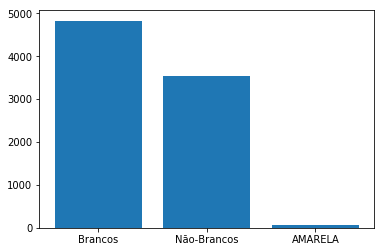

In [32]:
plt.bar(index, values)